![LAPAGE%20NORMAL.png](attachment:LAPAGE%20NORMAL.png)

### Première Partie - Importation des librairies et lecture des fichiers

### I. Importation des librairies

In [1]:
# Importons les librairies dont nous auront besoin
# Nous utiliserons en plus des librairies pour confirmer les corrélations à l'aide de tests statistiques.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import pearsonr
from scipy.stats import kruskal

### II. Récupération des fichiers

#### II.1.  Lecture des fichiers

#### II.1.1. transac_prod_cust3

In [2]:
# Récupérons notre fichier dans une variable
transac_prod_cust3 = pd.read_csv('transac_prod_cust3_DJ.csv')

#### II.1.2. b2b

In [3]:
# Récupérons notre fichier dans une variable
b2b = pd.read_csv('b2b_DJ.csv')

#### II.1.2. b2c

In [4]:
# Récupérons notre fichier dans une variable
b2c = pd.read_csv('b2c_DJ.csv')

### Deuxième Partie - Demandes de Julie

### I. Tests

TEST DE NORMALITE (SHAPIRO)


- Vérifier la normalité des données constitue est une étape cruciale avant la réalisation d'un test d'hypothèse mettant en jeu une ou plusieurs variables continues. Il s'agit donc de s'assurer que les variables continues sont distribuées selon la loi normale. Si cela est le cas, les tests d'hypothèse classiques sont applicables (ANOVA)
- Si la condition de normalité est violée, il faudra trouver une alternative dite "non paramétrique" au test d'hypothèse à réaliser(KRUSKAL)

TEST DE CORRÉLATION DE (CHI2)
- Le test d'indépendance du χ² mesure la corrélation entre 2 variables qualitatives ou catégorielles
- La fonction chi2 calcule la p_valeur pour le test d'hypothèse d'indépendance des fréquences observées dans le tableau de contingence

TEST DE CORRÉLATION DE PEARSON

- Il est utilisé pour étudier l’association entre un facteur d’étude et une variable de réponse quantitative, il mesure le degré d’association entre deux variables en prenant des valeurs entre -1 et 1.

- Le coefficient de Pearson est un indice reflétant une relation linéaire entre deux variables continues. 
- Le coefficient de corrélation varie entre -1 et +1, 0 reflétant une relation nulle entre les deux variables,
- une valeur négative (corrélation négative) signifiant que lorsqu'une des variable augmente, l'autre diminue ; 
- tandis qu'une valeur positive (corrélation positive) indique que les deux variables varient ensemble dans le même sens.


#### I.1. Genre et catégorie  (Chi 2)

- Nous avons affaire à deux variables qualitatives
- Nos deux variables catégorielles sont 'sexe' et 'catégorie' 

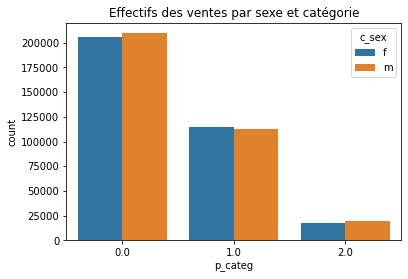

In [5]:
# visualisons le tableau de contingence pour voir plus clairement la repartition
# Construisons les diagramme en barres en discrétisant par le genre
sns.countplot(data=transac_prod_cust3, x='p_categ', hue='c_sex')
plt.title('Effectifs des ventes par sexe et catégorie')
plt.show()

- Les hommes achètent plus de livres de catégorie 0
- Les femmes achètent plus de livres de catégorie 1
- Les hommes achètent plus de livres de catégorie 2

In [6]:
# Tableau de contingence entre les variables 'catégorie' et 'sexe' qui va résumer ce que nous avons vu sur les graphiques
contingency_table = pd.crosstab(transac_prod_cust3['c_sex'],transac_prod_cust3['p_categ'])
contingency_table

p_categ,0.0,1.0,2.0
c_sex,,,
f,206220,114899,17283
m,209460,112270,19200


In [7]:
# Hypothèses
H0 = "pas de relation entre le genre et la catégorie des livres"
H1 = "Il y a une relation entre le genre et la catégorie des livres"

In [8]:
# Test du chi2
c, p, dof, expected = chi2_contingency(contingency_table)
# print the p_value
print('p_valeur:',p)
if p<0.05:
    print("On rejette l'hypothèse nulle")
else:
    print("On accepte l'hypothèse nulle")

p_valeur: 1.1989607410166063e-32
On rejette l'hypothèse nulle


- Etant donné que la p_valeur est inférieure au niveau de signification alpha = 0.05,
- On doit rejetter l'hypothèse nulle H(0)
- Il ya  corrélation entre le genre et la catégorie des livres achetés

#### I.2. Classes d'âge des clients et le montant total des achats

- Nous avons affaire à une variable qualitative et à une variable quantitative
- La variable qualitative est 'classes d'âge' et La variable quantitative est le 'montant des achats' 

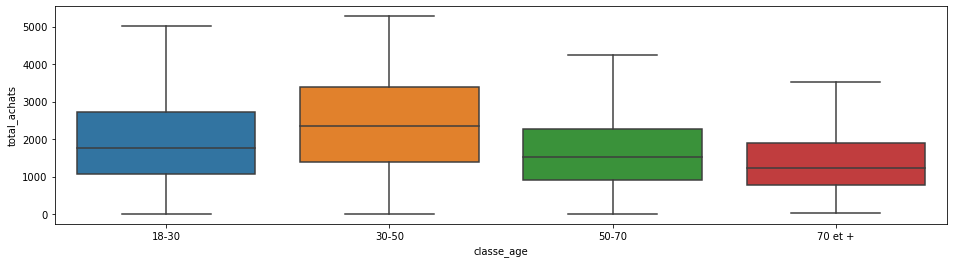

In [9]:
# Construisons les boîtes à moustaches
plt.figure(figsize=(16,4))
sns.boxplot(data=transac_prod_cust3.sort_values(by='classe_age'), 
            x='classe_age', y='total_achats', 
            showfliers=False, showmeans=False)
plt.show()

Le test de Shapiro-Wilk est un test permettant de savoir si une série de données suit une loi normale. lorsqu'on est en face d'une variable qualitative et d'une variable quantitative

In [10]:
# Shapiro
# hypotheses test normalité 
H0 = "La variable quantitative suit une distribution normale"
Ha = "La variable quantitative ne suit pas une distribution normale"

In [22]:
p = shapiro(transac_prod_cust3['total_achats'])
print('p_valeur:',p)
if p.pvalue < 0.05:
    print("On rejette l'hypothèse nulle")
else:
    print("On accepte l'hypothèse nulle")

p_valeur: ShapiroResult(statistic=0.2797296643257141, pvalue=0.0)
On rejette l'hypothèse nulle


C:\Users\moust\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- Test non paramétrique :  C’est un test qui ne suit pas la distribution normale.
- Dans ce cas test ne suit pas une distribution normale, donc nous appliquerons kruskal

In [12]:
# Kruskal
# Hypothèses
H0 = "Pas de relation entre l'âge et le montant total des achats"
H1 = "Il y a une relation entre l'âge et le montant total des achats"

In [23]:
# test le lien entre les deux variables
group1 = transac_prod_cust3[transac_prod_cust3["classe_age"] == "18-30"]["total_achats"]
group2 = transac_prod_cust3[transac_prod_cust3["classe_age"] == "30-50"]["total_achats"]
group3 = transac_prod_cust3[transac_prod_cust3["classe_age"] == "50-70"]["total_achats"]
group4 = transac_prod_cust3[transac_prod_cust3["classe_age"] == "70 et +"]["total_achats"]
a = kruskal(group1, group2, group3,group4)
print('p_valeur:',a)
if a.pvalue < 0.05:
    print("On rejette l'hypothèse nulle")
else:
    print("On accepte l'hypothèse nulle")

p_valeur: KruskalResult(statistic=54758.84535383601, pvalue=0.0)
On rejette l'hypothèse nulle


- Etant donné que la p_valeur est inférieure au niveau de signification alpha = 0.05,
- On doit rejeter l'hypoyhèse nulle H(0) et retenir l'hypothèse alternative H(1) 
- Il ya une relation entre l'âge et le montant total des achats

#### I.3. Age des clients et taille panier moyen 

- Nous avons affaire à deux variables quantitatives
- La taille du panier moyen évolue t-il en fonction de l'âge ?

Text(0.5, 1.0, 'Age vs taille_panier_moyen')

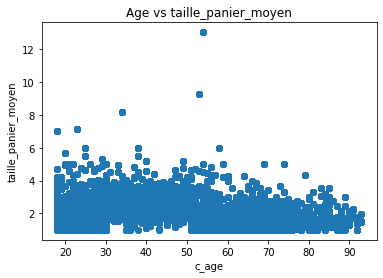

In [14]:
# Visualisons la relation sur un nuage des points
fig=plt.figure()
ax= plt.axes()
x=transac_prod_cust3[transac_prod_cust3['taille_panier_moyen'] < 30] ['c_age']

y=transac_prod_cust3[transac_prod_cust3['taille_panier_moyen'] < 30] ['taille_panier_moyen']
plt.scatter(x,y)
ax=ax.set(xlabel='c_age',ylabel='taille_panier_moyen')
plt.title('Age vs taille_panier_moyen')

- On peut voir une tendance qui se dégage
- Plus l'âge évolue, plus la taille du panier moyen baisse
- Le test de pearson confirme t'il cette tendance ?

In [24]:
# Test pearson
r, p = pearsonr(transac_prod_cust3['c_age'],transac_prod_cust3['taille_panier_moyen'] )

# Affichons le coefficient de correlation
print('Coef_cor_pearson:',r)
   

Coef_cor_pearson: -0.05030160425464768


- Une valeur négative (corrélation négative) signifiant que lorsqu'une des variable augmente, l'autre diminue ; 
- Dans le cas d'espèce , plus l'âge évolue, plus la taille du panier moyen baisse. Les deux variables n'évoluent pas dans le même sens.
- Il n'y a pas de corrélation entre l'âge et la taille du panier moyen

#### I.4. Age et catégorie des livres achetés  (Chi 2)

- Nous avons affaire à deux variables qualitatives
- Nos deux variables catégorielles sont 'Age' et 'catégorie' 

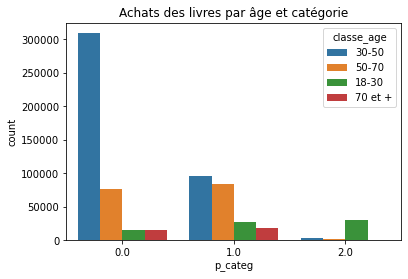

In [16]:
# Construisons les diagramme en barres en discrétisant par le sexe
# visualisons le tableau de contingence pour voir plus clairement la repartition
sns.countplot(data=transac_prod_cust3, x='p_categ', hue='classe_age')
plt.title('Achats des livres par âge et catégorie')
plt.show()

In [17]:
# Tableau de contingence entre les variables 'catégorie' et 'sexe' qui va résumer ce que nous avons vu sur les graphiques
cont_table = pd.crosstab(transac_prod_cust3['classe_age'],transac_prod_cust3['p_categ'])
cont_table

p_categ,0.0,1.0,2.0
classe_age,,,
18-30,15456,27751,30834
30-50,308943,96496,3770
50-70,76498,83797,1578
70 et +,14783,19125,301


In [18]:
# Hypothèses
H0 = "pas de relation entre la classe d'âge et la catégorie"
H1 = "Il y a une relation entre la classe d'âge et la catégorie"

In [19]:
# Test du chi2
c, p, dof, expected = chi2_contingency(cont_table)
# print the p_value
print('p_value for significance is:',p)
if p<0.05:
    print("On rejette l'hypothèse nulle")
else:
    ("On accepte l'hypothèse nulle")

p_value for significance is: 0.0
On rejette l'hypothèse nulle


- Etant donné que la p_valeur est inférieure au niveau de signification alpha = 0.05,
- On doit rejeter l'hypoyhèse nulle H(0) et retenir l'hypothèse alternative H(1) 
- Il ya  corrélation entre la classe d'âge et la catégorie des livres achetés

#### I.5. Age des clients et fréquence d'achat 

- Nous avons affaire à deux variables quantitatives
- La fréquence d'achat évolue t-elle en fonction de l'âge des clients ?

Text(0.5, 1.0, 'Age vs ventes_mensuelles')

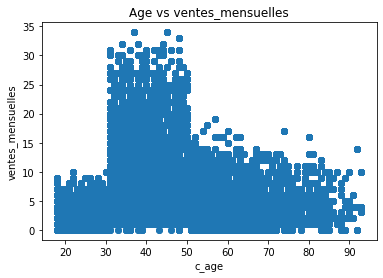

In [20]:
# Construisons le nuage de points pour avoir un aperçu de la corrélation
fig=plt.figure()
ax= plt.axes()
x=transac_prod_cust3[transac_prod_cust3['ventes_mensuelles'] < 200] ['c_age']
y=transac_prod_cust3[transac_prod_cust3['ventes_mensuelles'] < 200] ['ventes_mensuelles']
plt.scatter(x,y)
ax=ax.set(xlabel='c_age',ylabel='ventes_mensuelles')
plt.title('Age vs ventes_mensuelles')

- Il n'est pas évident de voir une tendance qui se dégage
- Que nous dit Le test de pearson ?

In [21]:
r, p = pearsonr(transac_prod_cust3['c_age'],transac_prod_cust3['ventes_mensuelles'] )

# Affichons le coefficient de correlation
print('Coef_cor_pearson:',r)


Coef_cor_pearson: -0.018592479096410423


- Une valeur négative (corrélation négative) signifiant que lorsqu'une des variables augmente, l'autre diminue ; 
- Dans le cas d'espèce , plus l'âge diminue, plus la fréquence d'achat baisse. Les deux variables n'évoluent pas dans le même sens.
- Il ya une relation entre l'âge et la fréquence d'achats.

### II. Conclusions

L'analyse de nos dataframes nous conduit à un certain nombre de constats :

Un pic anormal pour les gens de 18 ans (histogramme 19)
- un formulaire d'inscription à revoir 
- des mineurs qui s'inscrivent sur le site 
- Favoriser l'ad'hésion au site , en baissant l'âge d'adhésion afin d'augmenter le nombre d'ad'hérents en s'étendant sur les moins de 18 ans sur des contenus qui leurs sont adaptés. 

On constate une **forte parité** parmis la clientèle.
- la communication *globale* de la marque ne doit pas renvoyer une image **genrée** (Pyramide des âges)



Les 5 livres les plus vendus sont principalement de catégorie 2
- Entretenir les produits les plus rentables
- Il faut veiller au **stock** de ces produits.
Une rupture de l'un deux pourrait être très préjudiciable.

Les 5 livres les moins vendus sont principalement de catégorie 0
- Booster les produits les moins rentables

Les 30-50 ans rapportent le plus
- Ils representent 47 % du CA (diagramme en camenbert[57])
- Ils concentrent le plus gros chiffres d'affaires (boite à moustaches[60])
- Ils achètent plus de 8 livres par mois(boite à moustaches[61])
- Les fidéliser en offrant des bons de réductions ou les frais de livraisons gratuits, parrainage  




Les 4 clients b2b ont un comportement totalement différent.
Ce sont probablement des **libraires/bibliothèques** qui achètent en gros. Ils contribuent à **7% du CA**.
- Ils pourraient bénéficier **d'actions marketings et d'un accompagnement personnalisé**.